In [1]:
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
def initialize(context):
    context.stock = symbol("AAPL")
    context.index_average_window = 100

In [3]:
def handle_data(context, data):
    equities_hist = data.history(context.stock, "close", context.index_average_window, "1d")
    
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    order_target_percent(context.stock, stock_weight)

In [4]:
def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'],
            label = 'Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)
 
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

/usr/local/lib/python3.5/site-packages/empyrical/stats.py:713: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/usr/local/lib/python3.5/site-packages/empyrical/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


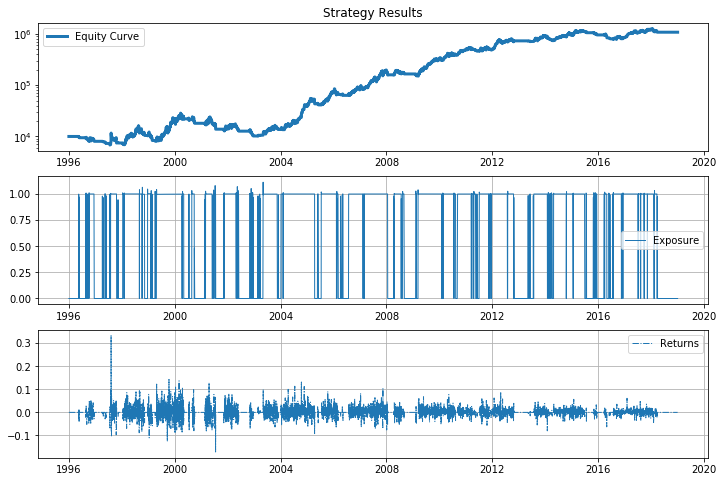

In [5]:
start_date = pd.Timestamp(datetime(1996, 1, 1, tzinfo=pytz.UTC))
end_date = pd.Timestamp(datetime(2018, 12, 31, tzinfo=pytz.UTC))

results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency='daily',
    bundle='quandl',
    benchmark_returns=None
)